# Reconocimiento y clasificacion de imagenes
## Modelo de red neuronal convolucional (CNN) para base de datos MNIST

Importamos las libreias necesarias para el modelo

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, Activation, Flatten,BatchNormalization, Activation,MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam

Cargamos los datos con la libreria pandas en formato CSV para poder manipularlos

In [28]:
train_data = pd.read_csv(r"C:\Users\pillo\Documents\python\clasificacion\train.csv")
test_data = pd.read_csv(r"C:\Users\pillo\Documents\python\clasificacion\test.csv")
train_data
#test_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Creamos los datos de prueba y entrenamiento para el modelo

In [30]:
x_train,y_train=train_data.iloc[0:,1:],train_data.iloc[0:,[0]]
x_test=test_data.iloc[0:,0:]

Con numpy generamos unas semilla aleatoria para psarle al modelo y graficamos 3 imagenes aleatorias en escala de grises

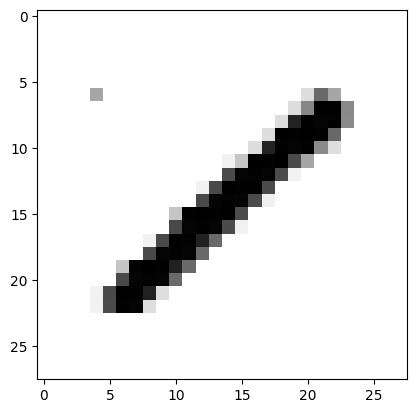

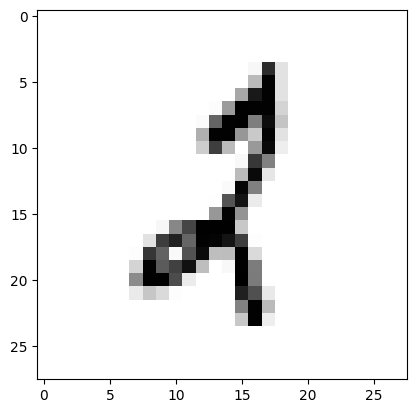

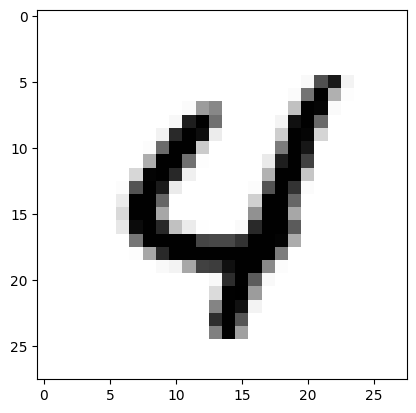

In [31]:
np.random.seed(182)
for i in range(3):
    plt.imshow(x_train.iloc[np.random.randint(0, 200)
                            ].values.reshape(28, 28), cmap='Greys')
    plt.show()


In [33]:
x_train = x_train.astype('float32')/255
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')/255


Cambiamos los datos a arreglos de numpy, reformamos los datos y covertimos el y_train en 10 categorias

In [34]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = kr.utils.to_categorical(y_train, 10)


Contruimos el primer modelo y optimizamos

In [35]:
model = Sequential()
model.add(Conv2D(32, 3, activation='relu',
          padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               802944    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                      

Ajustamos el modelo

In [36]:
#model fitting
result1=model.fit(x_train, y_train,batch_size=128, epochs=30)

Epoch 1/30
329/329 [==============================] - 24s 70ms/step - loss: 1.0878 - accuracy: 0.6659
Epoch 2/30
329/329 [==============================] - 23s 69ms/step - loss: 0.3243 - accuracy: 0.9036
Epoch 3/30
329/329 [==============================] - 22s 67ms/step - loss: 0.2598 - accuracy: 0.9221
Epoch 4/30
329/329 [==============================] - 22s 68ms/step - loss: 0.2124 - accuracy: 0.9362
Epoch 5/30
329/329 [==============================] - 22s 68ms/step - loss: 0.1803 - accuracy: 0.9456
Epoch 6/30
329/329 [==============================] - 22s 67ms/step - loss: 0.1582 - accuracy: 0.9524
Epoch 7/30
329/329 [==============================] - 22s 67ms/step - loss: 0.1427 - accuracy: 0.9564
Epoch 8/30
329/329 [==============================] - 22s 67ms/step - loss: 0.1291 - accuracy: 0.9615
Epoch 9/30
329/329 [==============================] - 22s 67ms/step - loss: 0.1196 - accuracy: 0.9627
Epoch 10/30
329/329 [==============================] - 22s 67ms/step - loss: 0.110

Contruimos el segundo modelo

In [37]:

model = Sequential()
model.add(Conv2D(32, 3, activation='relu',
          padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               802944    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                      

Y lo ajustamos de igual forma

In [38]:
result2=model.fit(x_train, y_train,batch_size=128, epochs=30)

Epoch 1/30
329/329 [==============================] - 22s 66ms/step - loss: 2.2414 - accuracy: 0.1803
Epoch 2/30
329/329 [==============================] - 22s 65ms/step - loss: 0.6199 - accuracy: 0.8333
Epoch 3/30
329/329 [==============================] - 21s 65ms/step - loss: 0.3121 - accuracy: 0.9059
Epoch 4/30
329/329 [==============================] - 21s 65ms/step - loss: 0.2413 - accuracy: 0.9268
Epoch 5/30
329/329 [==============================] - 22s 66ms/step - loss: 0.1962 - accuracy: 0.9397
Epoch 6/30
329/329 [==============================] - 21s 65ms/step - loss: 0.1643 - accuracy: 0.9500
Epoch 7/30
329/329 [==============================] - 22s 68ms/step - loss: 0.1422 - accuracy: 0.9559
Epoch 8/30
329/329 [==============================] - 23s 69ms/step - loss: 0.1255 - accuracy: 0.9610
Epoch 9/30
329/329 [==============================] - 25s 75ms/step - loss: 0.1139 - accuracy: 0.9652
Epoch 10/30
329/329 [==============================] - 24s 72ms/step - loss: 0.105

- Evaluamos los 2 modelos usando las metricas de presicion y perdida
- Mostramos la evaluacion com Mathplotlib
- Hacemos un subplot para mostrar los resultados
- Creamos un bucle para las metricas de los modelos y los graficamos

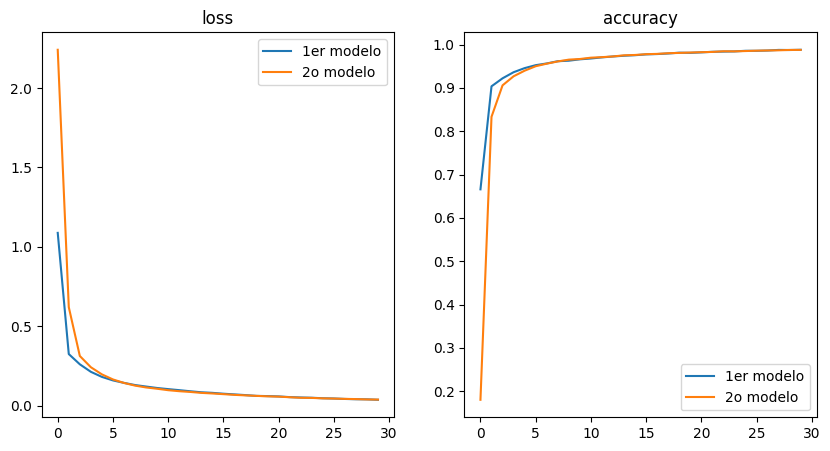

In [42]:
metrics = ['loss', 'accuracy']
plt.figure(figsize=(10, 5))
for i in range(len(metrics)):
    metric = metrics[i]
    plt.subplot(1, 2, i+1)
    plt.title(metric)
    plt_result1 = result1.history[metric]
    plt_result2 = result2.history[metric]

    plt.plot(plt_result1, label='1er modelo')
    plt.plot(plt_result2, label='2o modelo')
    plt.legend()
    
plt.show()


Probamos el modelo con un ejemplo y lo predecimos

1/1 [==============================] - 0s 18ms/step


array([[8.8652870e-13, 6.5488850e-16, 1.8607986e-08, 1.0242844e-08,
        1.1154975e-19, 1.6360280e-15, 6.9050549e-17, 1.0000000e+00,
        1.4229977e-12, 3.4832460e-08]], dtype=float32)

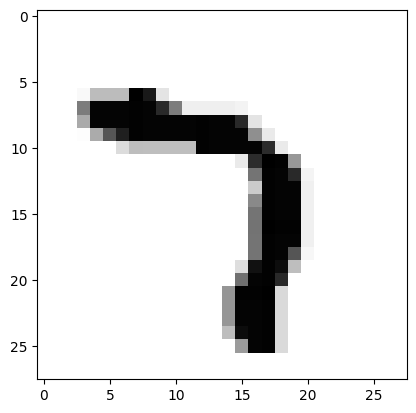

In [107]:
i = 45

plt.imshow(x_test[[i]].reshape(28, 28), cmap='Greys')

prediction = model.predict(x_test[[i]])
prediction


Revisamos el resultado del modelo

In [109]:
print("La respuesta es",np.argmax(prediction))

La respuesta es 7
